# AMAT502:  Lecture 21

April 2, 2019.

Michael Lamoureux

## Fun with filters

I sort of realized that we can have some fun with filtering in this class, give the tools in a Jupyter notebook. So let's play.

In [95]:
## Some startup commands

%matplotlib inline
from numpy import * 
from scipy import *
from math import tau
from matplotlib.pyplot import *
from IPython.display import IFrame
from IPython.display import Audio, display  ## to output audio

from ipywidgets import interact
from scipy.signal import lfilter



## Summary - 


- What is a filter?
- Filters using convolution
- Filter properties as revealed by Fourier transform
- Filter design, for simple filters
- Recursive filters
- Filter design using software tools

## Filter design

We can move between filters coefficients and filter reponse using the Fourier transform. Finite filters are connected to polynomials in $z$. Roots of the polynomial tell us all we need to know about the filter or polynomial. 

### Ideal lowpass, highpass filter

The idea lowpass filter looks like this:

In [2]:
## Plot a low pass response

def displayLow(f0=0.2):
    f=linspace(0,0.5,1024)
    H = (1-sign(f-f0))/2
    plot(f,H,'-');


interact(displayLow,f0=(0,.5,.01));

interactive(children=(FloatSlider(value=0.2, description='f0', max=0.5, step=0.01), Output()), _dom_classes=('…

The frequence $f=0.2$ where the jump happens is called the cutoff frequency.

A high pass filter looks like the following: 

In [3]:
## Plot a high pass response

def displayHigh(f0=0.2):
    f=linspace(0,0.5,1024)
    H = (1+sign(f-f0))/2
    plot(f,H,'-');


interact(displayHigh,f0=(0,.5,.01));

interactive(children=(FloatSlider(value=0.2, description='f0', max=0.5, step=0.01), Output()), _dom_classes=('…

## An integration trick

We know we can compute the Fourier coefficients for the filter by using the Fourier transform. Take advantage of the fact the the function is periodic. Let's look at the lowpass filter response, over a longer interval. Notice the function is both periodic, and symmetric around f=0.

In [4]:
## Plot a low pass response

def displayLow2(f0=0.2):
    f=linspace(-1,1,1024)
    f_per = mod(f,1)
    H = (1-sign(f_per-f0))/2 + (1-sign(1-f_per-f0))/2
    plot(f,H,'-');


interact(displayLow2,f0=(0,.5,.01));

interactive(children=(FloatSlider(value=0.2, description='f0', max=0.5, step=0.01), Output()), _dom_classes=('…

To get the filter coefficients for the low pass filter, we choose a convenient interval of length one. Since we have symmetric around zero, it makes sense to integrate on the symmetric interval $[-0.5,0.5]$ which has length one. 

We can compute the integral, noting that the function $H(\omega)$ is equal to one only on the subinterval $[-f_0,f_0]$. So the integral reduces to an integral on that smaller interval.



$$h_n = \int_{-f_0}^{f_0} H(\omega) e^{-2\pi i n \omega} d\omega = 
\int_{-f_0}^{f_0} \cos(2\pi n\omega) + i\sin(2\pi n \omega) d\omega  $$
$$= 2\int_{0}^{f_0} \cos(2\pi n\omega) d\omega + 0 = 
\frac{\sin(2 \pi n f_0 )}{n \pi} =2f_0 \mbox{sinc}(2 f_0 n),$$
where we use the fact that the sine function is odd, so it integrates to zero. The cosine function is even, so we can integrate on half the interval, and double it.

Note we are using the normalized sinc function as defined by
$$\mbox{sinc}(x) = \frac{\sin(\pi x)}{\pi x}.$$

(There is also a non-normalized sinc function, which does not have the $\pi$ in it. We are not useing that one.)

In the last lecture, we looked at the coefficient for $f+0 = .2$ Here it is again.

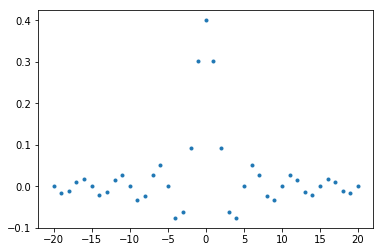

In [5]:
n = arange(-20,21)
h = 0.4*sinc(0.4*n)
plot(n,h,'.');

Let's animate this. We can select the filter cutoff frequency f0, and see how the filter coefficients change. You might notice for low freqeuncy f0, we can see the shape of the sinc function, sampled. 

In the frequency domain, we look at the interval $[-0.5,0.5]$.

In [6]:
## Plot a low pass response, and 41 filter coefficients

def displayLow3(f0=0.1):
    f=linspace(-0.5,0.5,1024)
    f_per = mod(f,1)
    H = (1-sign(f_per-f0))/2 + (1-sign(1-f_per-f0))/2
    n = arange(-20,21)
    h = 2*f0*sinc(2*f0*n)
    fig = figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.plot(f,H,'-');
    ax2.plot(n,h,'.');


interact(displayLow3,f0=(0,.5,.01));

interactive(children=(FloatSlider(value=0.1, description='f0', max=0.5, step=0.01), Output()), _dom_classes=('…

## Let's look at Gibbs phenomena. 

We can adjust both the cutoff frequency for the lowpass filter, and the number of coefficients we use in the filter. 

In [8]:
## Plot a low pass filter, and the FFT of the truncated coefficients

def displayLow4(f0=0.1,nmax=40):
    nmax2 = round(nmax/2)
    f=linspace(-0.5,0.5,1024)
    f_per = mod(f,1)
    H = (1-sign(f_per-f0))/2 + (1-sign(1-f_per-f0))/2
    n = arange(-nmax2,nmax2+1)
    h = 2*f0*sinc(2*f0*n)
    hlong = 0*linspace(0,1,1024)
    hlong[0:size(h)] =h
    fig = figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.plot(f,H,'-');
    ax2.plot(f,abs(np.fft.fftshift(fft(hlong))));


interact(displayLow4,f0=(0,.5,.01),nmax=(2,60,2));

interactive(children=(FloatSlider(value=0.1, description='f0', max=0.5, step=0.01), IntSlider(value=40, descri…

In [ ]:
hlong = 0*linspace(0,1,1024)
hlong[0:size(h)] =h
plot(abs(fft(hlong)));

# These ripples are called Gibbs phenomena. 

They don't go away even as as you add more terms. 

In [ ]:
nmax = 50  ## Try different values here. 10, 20, 50, 100
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)
hlong = 0*linspace(0,1,1024)
hlong[0:size(h)] =h
f = linspace(0,1,size(hlong))
plot(f,abs(fft(hlong)));

## Truncating with a window

What's going on here is the coefficients $h_n$ are being truncated to a finite non-zero sequence. This is the same as being mulplied by a window, in this case a function that is equal to 1 from -nmax to +nmax, and 0 othersze. The Fourier transform of this window is a sinc function, so it has the wiggles in it. As shown in this diagram:


In [ ]:
nmax = 10  # this is the half-width of the truncating window
N = 1024
N2 = N//2
f = linspace(0,1,N)
wlong = 0*f
wlong[0:2*nmax] = 1
fftlong = fft(wlong)
front = fftlong[0:N2]
back = fftlong[N2:N]
plot(f[0:N2],real(front),f[0:N2]-.5,real(back));

So these wiggles get convolved with the square shape of the ideal lowpass filter, to get the wiggly version of the lowpass filter.



In [ ]:
## Plot a low pass response
N=1024
N2 = 1024//2
f=linspace(0,1,N)
H = (1-sign(f-0.2))/2

## Look at the FT of the square window function
nmax = 10  ## Try different values here. 10, 20, 50, 100
wlong = 0*f
wlong[0:nmax] = 1
wlong[(N-nmax):nmax] = 1
fftlong = fft(wlong)
front = real(fftlong[0:N2])
back = real(fftlong[N2:N])

#3 Now the FT of the truncated filter coefficients
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)
hlong = 0*linspace(0,1,N)
hlong[0:size(h)] =h

ff, axs = subplots(1,3,figsize=(15,5))
subplot(1,3,1,title='Ideal lowpass')
plot(f,H,'-')
subplot(1,3,2,title='Convolver due to window')
plot(f[0:N2],front,f[0:N2]-.5,back)
subplot(1,3,3,title='Resulting finite filter')
plot(f,abs(fft(hlong)));



## Other windows

We can try other windows. 

Here is a Gaussian. The nice thing about a Gaussian is that its FT is also a Gaussian, so we get a nice smoother.

Try different values of nmax

In [ ]:
nmax = 30
gfactor = 0.01 # factor inside the Gaussian. Try 0.1 0.01 etc
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)
window = exp(gfactor*(-n**2)/nmax*nmax)
h=h*window
hlong = 0*linspace(0,1,1024)
hlong[0:size(h)] =h
plot(abs(fft(hlong)));

## Cosine, cosine-squared windows


In [ ]:
## A cosine window
nmax = 10
gfactor = 0.01 # factor inside the Gaussian. Try 0.1 0.01 etc
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)
window = cos(0.5*pi*n/nmax)
h=h*window
hlong = 0*linspace(0,1,1024)
hlong[0:size(h)] =h
plot(abs(fft(hlong)));

In [ ]:
## A cosine squared window
nmax = 20
gfactor = 0.01 # factor inside the Gaussian. Try 0.1 0.01 etc
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)
window = cos(0.5*pi*n/nmax)**2
h=h*window
hlong = 0*linspace(0,1,1024)
hlong[0:size(h)] =h
plot(abs(fft(hlong)));

## Roots of the filter response

Recall the Fourier coefficients map out a polynomial in the complex plane. It is interesting to notice that the polynomial is determined by its roots. Many of the roots are on the unit circle, which forces the Fourier transform to be zero there. 

Here is a quick example of a lowpass filter with cutoff at f0=0.2

Then look at the animated version.

In [9]:
N=1024
N2 = 1024//2
f=linspace(0,1,N)
H = (1-sign(f-0.2))/2

## Look at the FT of the square window function
nmax = 9  ## Try different values here. Don't use a multiple of 10, otherwise the polynomial has zero coefficients at the ends . 
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)

r = roots(h)
r


array([ 1.47486378+0.j        ,  1.1319377 +0.87420505j,
        1.1319377 -0.87420505j, -0.98787003+0.15528296j,
       -0.98787003-0.15528296j, -0.89265241+0.45074568j,
       -0.89265241-0.45074568j, -0.71176603+0.70241663j,
       -0.71176603-0.70241663j, -0.4635645 +0.88606318j,
       -0.4635645 -0.88606318j, -0.1741932 +0.9847115j ,
       -0.1741932 -0.9847115j ,  0.12064336+0.99269592j,
        0.12064336-0.99269592j,  0.55337475+0.427376j  ,
        0.55337475-0.427376j  ,  0.67802872+0.j        ])

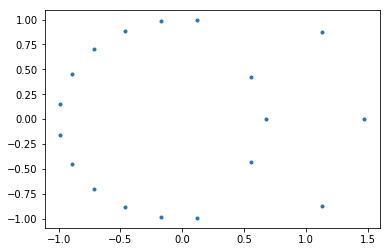

In [15]:
plot(r.real,r.imag,'.');

In [17]:
## Plot a low pass filter, and the roots of the truncated coefficients

## Note there are errors when the root finder fails. That's interesting. 

def displayLow5(f0=0.1,nmax=42):
    nmax2 = round(nmax/2)
    f=linspace(-0.5,0.5,1024)
    f_per = mod(f,1)
    H = (1-sign(f_per-f0))/2 + (1-sign(1-f_per-f0))/2
    n = arange(-nmax2,nmax2+1)
    h = 2*f0*sinc(2*f0*n)
    r = roots(h)
    fig = figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.plot(f,H,'-');
    ax2.plot(r.real,r.imag,'.');
    x = cos(linspace(0,tau))
    y = sin(linspace(0,tau))
    ax2.plot(x,y,'-')


interact(displayLow5,f0=(0,.5,.01),nmax=(2,60,2));

interactive(children=(FloatSlider(value=0.1, description='f0', max=0.5, step=0.01), IntSlider(value=42, descri…

## Comments on the zeros

Notice there are lots of zeros near the unit circle, but none near z=1 (since lowpass)

## Comparing zeros

Let's look at zeros for the hard truncated window, and then for the cosine-window truncated window.

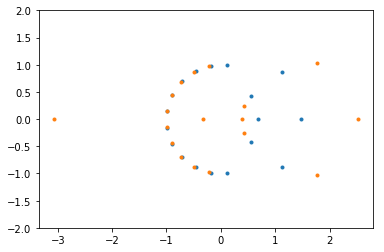

In [30]:
## A cosine squared window
n_coeff = 19 # an odd number of coefficients, for symmetry
nmax = (n_coeff-1)/2
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)
window = cos(0.5*pi*n/(nmax+1))**2
hw=h*window
r = roots(h)
rw = roots(hw)
plot(r.real,r.imag,'.',rw.real,rw.imag,'.')
axis('equal');

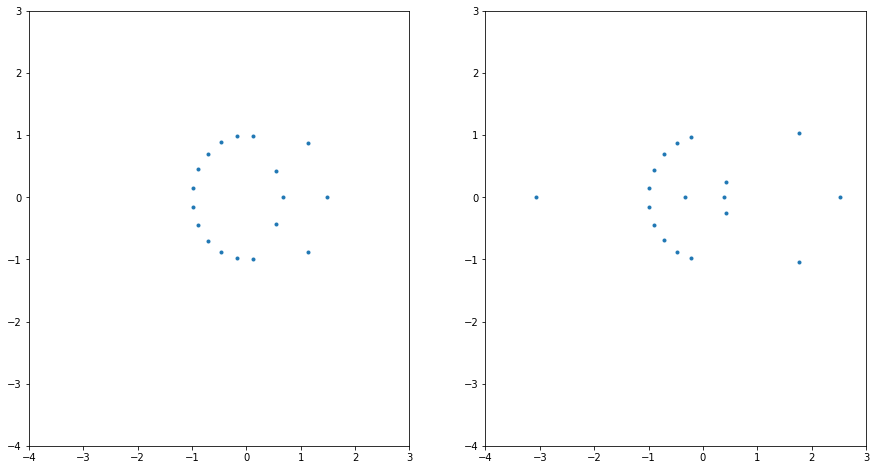

In [31]:
ff, axs = subplots(1,2,figsize=(15,8))
subplot(1,2,1)
plot(r.real,r.imag,'.')
xlim([-4,3])
ylim([-4,3])
subplot(1,2,2)
plot(rw.real,rw.imag,'.')
xlim([-4,3])
ylim([-4,3]);


## Let's animated a smooth interpolation between these two filters

We can interpolated between two filters by taking a convex combination
$$h = t\cdot h_1 + (1-t)\cdot h_2.$$

The roots move in a pretty interesting way. Try it out. 

In [27]:
## Plot a low pass filter, and interpolate between a window and a truncated filter

## Note there are errors when the root finder fails. That's interesting. 

def displayLow6(f0=0.1,n_coeff=19,t=0):
    nmax = round((n_coeff-1)/2)
    f=linspace(-0.5,0.5,1024)
    f_per = mod(f,1)
    H = (1-sign(f_per-f0))/2 + (1-sign(1-f_per-f0))/2
    n = arange(-nmax,nmax+1)
    h1 = 2*f0*sinc(2*f0*n)
    window = cos(0.5*pi*n/(nmax+1))**2
    h2=h1*window
    h = (1-t)*h1 + t*h2
    r = roots(h)
    fig = figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.plot(f,H,'-');
    ax2.plot(r.real,r.imag,'.');
    x = cos(linspace(0,tau))
    y = sin(linspace(0,tau))
    ax2.plot(x,y,'-')


interact(displayLow6,f0=(0,.5,.01),n_coeff=(3,61,2),t=(0.0,1.0,.05));

interactive(children=(FloatSlider(value=0.1, description='f0', max=0.5, step=0.01), IntSlider(value=19, descri…

#  Filters and sound 

We should be able to filter some sounds, and here the difference.

Let's start by filtering some random noise. Both in low pass, and in high pass.

Maybe we can even adjust the number of filters coefficients. 

You might want to verify that there is an easy formula to compute the coefficients of the high pass filter from the low pass. 


In [91]:
Fs = 8000
random_sd = random.randn(Fs)

def displayAudio1(f0=0.1,n_coeff=19):
    global h_lo,h_hi
    nmax = round((n_coeff-1)/2)
    n = arange(-nmax,nmax+1)
    h1 = 2*f0*sinc(2*f0*n)
    h2 = -h1
    h2[nmax] = 1-h1[nmax]  # we compute the high pass filter coefficients
    window = cos(0.5*pi*n/(nmax+1))**2
    h_lo=h1*window
    h_hi=h2*window
    random_lo = convolve(h_lo,random_sd)
    random_hi = convolve(h_hi,random_sd)
    a1=Audio(data=random_sd, rate=Fs)
    a2=Audio(data=random_lo, rate=Fs)
    a3=Audio(data=random_hi, rate=Fs)
    display("Original:",a1,"Low Pass:",a2,"Hi Pass:",a3)


interact(displayAudio1,f0=(0,.5,.01),n_coeff=(3,61,2));


interactive(children=(FloatSlider(value=0.1, description='f0', max=0.5, step=0.01), IntSlider(value=19, descri…

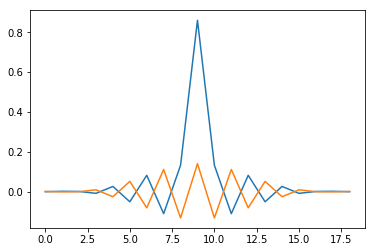

In [61]:
## We can check the coefficients
plot(h_lo),plot(h_hi);

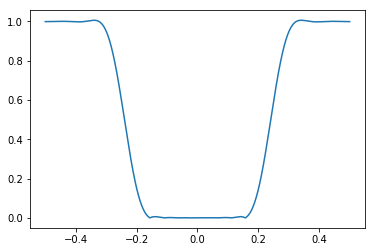

In [67]:
## We can also check the frequency response
f=linspace(-0.5,0.5,1024)
hlong = 0*linspace(0,1,1024)
hlong[0:size(h)] =h_hi
plot(f,abs(np.fft.fftshift(fft(hlong))));

## Recursive filters
## Infinite Impulse Response (IIR) filters

The filters above all had polynomials for their Fourier transform.

We get a wider class of functions by considering rational functions of a complex variable $z$. That is, the ratio of two polynomials. Such a function has roots (zeros of the numerator) and poles (zeros of the denominator). Turns out you have have filters with whose *transfer function* is a rational function. Which is to say the Fourier transform of the filter is a rational function of complex variable $z$ restricted to the unit circle.

It is best to start with a very simple example.

Imagine you have input and output vectors
$$ \mathbf{x} = (x_0,x_1,x_2,x_3, \ldots)$$ and
$$ \mathbf{y} = (y_0,y_1,y_2,y_3, \ldots)$$

Now compute the output from the input by these formulas:
$$y_0 = x_0$$
$$y_1 = x_1 + \frac{1}{2}y_0$$
$$y_2 = x_2 + \frac{1}{2}y_1$$
$$\cdots$$
$$y_n = x_n + \frac{1}{2}y_{n-1}$$

For example, if we start with input
$$\mathbf{x} = (1,0,00,0,\ldots)$$ we get output
$$\mathbf{y} = (1,1/2, 1/4, 1/8,1/16, \ldots).$$
This sequence $\mathbf{y}$ is called the *impulse response* to the filter. 

It is called an *infinite impulse response* because the single spike (delta function) in the input gave an infinitely long non-zero sequence in the output.

It is called a *recursive filter* because we have to recurse on the previously calculated values of the output $\mathbf{y}$ in order to compute the next entries of $\mathbf{y}$.

## Filter response

For this example, we can take the FT of the impulse response to get the filter response curve.

Let's do this in code.


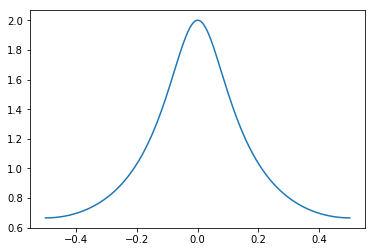

In [116]:
N=1024
f = linspace(-.5,.5,N)
h = 2.0**(-(arange(0,N)))
plot(f,np.fft.fftshift(abs(fft(h))));

So this not quite a lowpass filter. But it does amplify low frequencies more than high frequencies, which is what we want in a low pass filter. 

## Impulse response

Another way to compute the impulse response is to do a power series expansion for a rational function.

For convolution filters, the Z-transform gives a polynomial, which gives the freqeuncy respone by evaluating on the unit circle. The coefficients of that polynomial **is** the impulse response. 

For recursive filters, you have to work a little harder.

In our example, we have the computation
$$y_n = x_n + \frac{1}{2}y_{n-1}$$ or equivalently
$$y_n - \frac{1}{2}y_{n-1}= x_n $$, which we recognize as a convolution on the right,
$$g_0y_n + g_1y_{n-1}= x_n $$, with the filter $(g_0,g_1) = (1,-1/2)$.

Taking z-transforms, we get
$$G(z)Y(Z) = X{z}$$ or equivalently
$$Y(z) = \frac{1}{G(z)}X(z),$$
where the rational function
$$R(z) = \frac{1}{G(z)} = \frac{1}{1-z/2}$$
represents the effect of the filter (the transfer function). 

The filter response is give by evaluating $R(z)$ on the unit circle, so
$$R(e^{2\pi i \omega}) = \frac{1}{1-0.5e^{2\pi i \omega}}.$$

We can plot this directly, without using a Fourier transform of the impulse response.

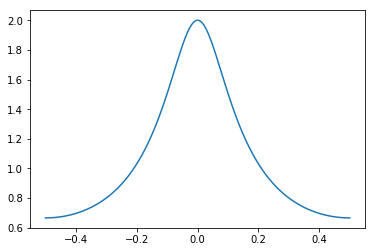

In [118]:
N=1024
f = linspace(-.5,.5,N)
r = 1/(1-0.5*exp(2*pi*1j*f))
plot(f,abs(r));

Notice this is the same plot as before, from the impulse response. 

Of course, we can also get the impulse response directly from the rational function, by expanding in a Taylor series. Notice we can expand that reciprocal as a geometric series:

$$R(z) = \frac{1}{1-z/2} =  1 + (z/2) + (z/2)^2 + (z/2)^3 + (z/2)^4 + \cdots$$
$$ = 1 + (1/2)z + (1/4)z^2 + (1/8)z^3 + (1/16)z^4 + \cdots$$
and those coefficients $1,1/2,1/4,1/8,\cdots$ are exactly the terms that appear in the impulse response above.

Let's animate this filter response, using the one parameter $r$ in the response
$$R(z) = \frac{1}{1-rz}.$$
Notice we need $-1<r<1$ in order for this function to not blow up on the unit disk!

For r positive, we get low pass. For r negative, we get high pass. 

In [121]:
## Plot a low pass response

def displayIIR(r=.5):
    f = linspace(-.5,.5,N)
    resp = 1/(1-r*exp(tau*1j*f))
    plot(f,abs(resp));

interact(displayIIR,r=(-.99,.99,.01));

interactive(children=(FloatSlider(value=0.5, description='r', max=0.99, min=-0.99, step=0.01), Output()), _dom…

## General IIR filters

In general, we can define recursive filters in the form
$$y_n = \sum_{k=0}^N h_k x_{n-k} - \sum_{k=1}^N g_k y_{n-k},$$
where we pick the coefficients $h_k, g_k$ however we like. Notice, however the $h_k$ start at $_0$ while the $g_k$ start at $g_1$. That is because we can only use past values of the $y_{n-k}$ when trying to compute the next value of $y_n$. 

We can pull the sum with the $y_k$'s to the left, and get the convolution form
$$\sum_{k=0}^N g_k y_{n-k} = \sum_{k=0}^N h_k x_{n-k},$$
with the understanding that now we set $g_0 = 1$, so the $y_n$ term is correct. In convolution form we write
$$ \mathbf{g}*\mathbf{y} = \mathbf{h}*\mathbf{x},$$
and taking z-tranforms, the convolution becomes a product, so
$$G(z)Y(z) = H(z)X(z).$$

Thus we have the input-output result as
$$Y(z) = \frac{H(z)}{G(z)}X(z).$$
Now, recall that $H(z), G(z)$ are polynomials, so $R(z) = H(z)/G(z)$ is a rational function, with poles and zeros. So our transfer function is rational. 

The filter response is obtained by evaluating the function $R(z)$ on the unit circle in the complex plane.

As with polynomials, the magnitude of the amplitude is determined by the distance of the zeros and poles to the unit circle. (or course, for the poles, you have to divide by the distance). That is
$$ |R(z)| = c\frac{|z-z_1|\cdot|z-z_2|\cdot|z-z_2|\cdots}{|z-p_1|\cdot|z-p_2|\cdot|z-p_2|\cdots},$$
where the $z_k$ are the zeros and the $p_k$ are the poles.

Note you have to be careful with the poles. They should be outside the unit circle. Because inside the unit circle, you will get unstable filters.

For instance the filter
$$y_n = x_n + 2 y_{n-1}$$ is unstable, since the unit delta input
$$\mathbf{x} = (1,0,0,0,\ldots)$$
leads to the output
$$\mathbf(y) = (1,2,4,8,16,\ldots)$$
which is blowing up. That's bad!

The transfer function is of course $R(z) = 1/(1-2z)$ which has a pole at $z=1/2, inside the unit circle. That is our warnign that the filter will be unstable.

So, as wih zeros, you can always reflect the poles across the unit circle by taking reciprocals.

## Complex conjugate pairs

Keep in mind, your zeros and poles should either be real, or come in complex conjugate pairs. This way the corresponding polynomails and the resulting rational functions will have real coefficients. 

Who cares? Will, if you are filtering real signals, you would like the result to be real. So the coefficients for $h_k,g_k$ better be real. 

## Example. 

A better lowpass filter.  We say that the one recursive term gave us a fast decrease in the lowpas filter. Let's make it a real lowpass filter by inserting a zero at $z=-1$. So we can try something like
$$R(z) = \frac{1+z}{1-0.5z}.$$

Let's look at the filter response for this. But hey, let's be more general. Replace $0.5$ with a parameter $\lambda$ and let's normalize so we have unit amplitude at zero frequency.

So, we try
$$R(z) = \frac{1-\lambda}{2}\frac{1+z}{1-\lambda z}.$$

We can plot this for various values of $\lambda$.

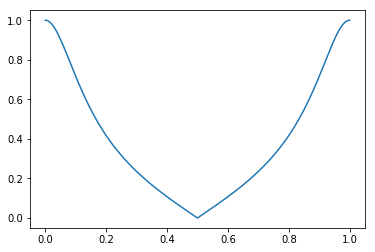

In [74]:
lam = 0.5
N=1024
f = linspace(0,1,N)
r = 0.5*(1-lam)*(1+exp(2*pi*1j*f))/(1-lam*exp(2*pi*1j*f))
plot(f,abs(r));

## Built in filter

There are lots of interesting pre-built filters.

The challenge is to find out how to use them.  

Here we play around with the butterworth filter. This has a maximally flat pass band. (Flat like a pancake, perhaps?)

b,a are the coefficients of the numerator and denominator for the transfer function. The order is important!

In [75]:
from scipy.signal import butter, freqz
b,a = butter(10, .4)   # 10 = order of the filter, .4 = .4 of Nyquist freq. 

In [76]:
b

array([0.00049945, 0.00499454, 0.02247543, 0.05993449, 0.10488536,
       0.12586243, 0.10488536, 0.05993449, 0.02247543, 0.00499454,
       0.00049945])

In [77]:
a

array([ 1.00000000e+00, -1.99240148e+00,  3.01948286e+00, -2.81852243e+00,
        2.03872064e+00, -1.05454462e+00,  4.14446269e-01, -1.15718625e-01,
        2.24985093e-02, -2.66891235e-03,  1.48764452e-04])

In [78]:
roots(b)

array([-1.04792164+0.01589021j, -1.04792164-0.01589021j,
       -1.02882267+0.04101782j, -1.02882267-0.04101782j,
       -0.99903174+0.04954934j, -0.99903174-0.04954934j,
       -0.97058101+0.03917676j, -0.97058101-0.03917676j,
       -0.95364294+0.01475485j, -0.95364294-0.01475485j])

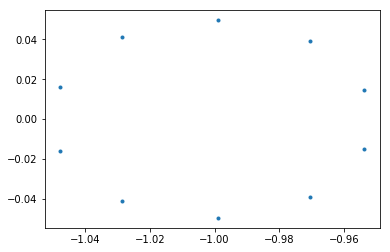

In [79]:
plot(roots(b).real,roots(b).imag,'.');

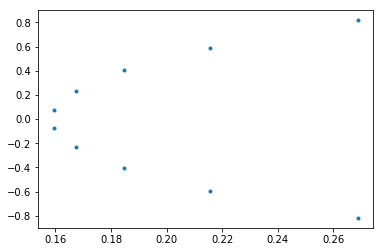

In [80]:
plot(roots(a).real,roots(a).imag,'.');

In [81]:
w, h = freqz(b, a);

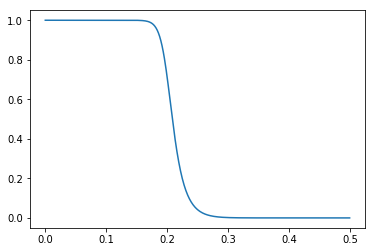

In [82]:
plot(w/(2*pi), abs(h));

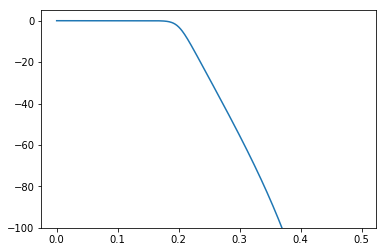

In [83]:
plot(w/(2*pi), 20*log10(abs(h)))
ylim([-100,5]);

## A digital resonator

I always heard about these things, they are simple filter recursive filters. You can read about it here:

https://www.phon.ucl.ac.uk/courses/spsci/dsp/resoncon.html

The point is, the rational function is of the form
$$\frac{1}{1 - 2r\cos(w)z^{-1} + r^2z^{-2}},$$
where $r$ is close to 1, and sets the bandwidth of the filter, and $\cos(w)$ determines the resonant frequency of the filter, with $w$ measured in radians.

This brings up a couple of interesting points. First, lots of people work in radians. I prefer to work in frequency, or frequency expressed as a fraction of sample rate. So I would replace $\cos(w)$ with $\cos(2\pi f)$, with $f$ a number between 0 (low freq) and 1/2 (high frequency, at Nyquist rate). 

Second, we notice they use $z^{-1}$ while we typically use $z$. Our approach gives us a rational function that is analytic INSIDE  the unit disk on the complex plane. Their approach gives a function analytic OUTSIDE the unit disk. The approaches are equivalent, but the math is easier if we work on the INSIDE of the unit disk.

So we should look at the rational function
$$H(z) = \frac{1}{1 - 2r\cos(2\pi f)z + r^2z^{2}}.$$

We can plot the frequency response by evaluating this along the unit circle, as in the following code:


In [112]:
def displayRez(f0=0.1,r=.9):
    f=linspace(-0.5,0.5,1024)
    h = [1,-2*r*cos(tau*f0),r**2]
    r = roots(h)
    z = exp(tau*1j*f)
    Hz = 1/(h[0] + h[1]*z + h[2]*z*z)
    fig = figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.plot(r.real,r.imag,'.');
    ax1.plot(z.real,z.imag,'-')
    ax2.plot(f,abs(Hz),'-')


interact(displayRez,f0=(0,.5,.01),r=(0.,1.0,.05));

interactive(children=(FloatSlider(value=0.1, description='f0', max=0.5, step=0.01), FloatSlider(value=0.9, des…

## Action of the IIR filter

Here, we have the filter and its behaviour. 

For r close to 1, the filtered signal will sounds like a "bottle instrument," where you blow air across the mouth of a glass bottle, and hear a resonant sound. 

In [111]:
Fs = 8000
random_sd = random.randn(Fs)

def displayAudio2(f0=0.4,r=.98):
    h = [1,-2*r*cos(tau*f0),r**2]
    random_filt = lfilter([1],h,random_sd)
    a4=Audio(data=random_sd, rate=Fs)
    a5=Audio(data=random_filt, rate=Fs)
    display("Original:",a4,"filter:",a5)


interact(displayAudio2,f0=(0,.5,.01),r=(0.5,1.0,.01));

interactive(children=(FloatSlider(value=0.4, description='f0', max=0.5, step=0.01), FloatSlider(value=0.98, de…

## What happens when $r=1$? 